1. Considere el siguiente areglo que contiene la altura de un grupo de estudiantes de Henry y cálcule:

* Media.
* Mediana.
* Moda
* Varianza
* Desvío estándar.

In [79]:
import pandas as pd
import numpy as np
muestra = np.array( [[1.85, 1.8, 1.8 , 1.8],
                    [1.73,  1.7, 1.75, 1.76],
                    [ 1.65, 1.69,  1.67 ,  1.6],
                    [1.54,  1.57, 1.58, 1.59],
                    [ 1.4 , 1.42,  1.45, 1.48]]) 

In [80]:
from scipy import stats

In [81]:
stats.mode(muestra, axis=None)

ModeResult(mode=1.8, count=3)

In [82]:
import statistics

In [83]:
statistics.mode(muestra.flatten())

1.8

In [84]:
def tendencias(arreglo):
    arreglo=arreglo.flatten()
    arreglo=np.sort(arreglo)
    print(arreglo)

    #calcular la media
    suma=0
    cantidad=0
    for e in arreglo:
        suma+=e
        cantidad+=1
    media=suma/cantidad

    #calcular la mediana
    if ((len(arreglo)+1)/2)%2==0:
        mediana=arreglo[int((len(arreglo)+1)/2)-1]
    else:
        mediana=(arreglo[int(len(arreglo)/2)-1]+arreglo[int(len(arreglo)/2)])/2

    #calcular el modo
    fre_max=0
    f=1
    for i,e in enumerate(arreglo):
        if i>0:
            if arreglo[i]==arreglo[i-1]:
                f+=1
                if f>fre_max:
                    fre_max=f
                    moda=arreglo[i]
            else:
                f=1

    #calcular la varianza
    suma_cuadrados=0
    for e in arreglo:
        suma_cuadrados+=(e-media)**2
    varianza=suma_cuadrados/cantidad
    desv_std=varianza**0.5
        
    #Resultados
    print("Resultados:")
    print("La media es:", round(media,4))
    print("La mediana es:", round(mediana,4))
    print("La moda es: ", moda, " y se repite: ", fre_max, " veces")
    print("La Varianza es:", round(varianza,4))
    print("El desvio estandar es:", round(desv_std,4))

In [85]:
tendencias(muestra)

[1.4  1.42 1.45 1.48 1.54 1.57 1.58 1.59 1.6  1.65 1.67 1.69 1.7  1.73
 1.75 1.76 1.8  1.8  1.8  1.85]
Resultados:
La media es: 1.6415
La mediana es: 1.66
La moda es:  1.8  y se repite:  3  veces
La Varianza es: 0.0176
El desvio estandar es: 0.1328


In [86]:
print(np.mean(muestra))
print(np.median(muestra))
print(np.std(muestra))
print(np.var(muestra))
print(muestra.size)


1.6415
1.66
0.13282601401833907
0.017642750000000006
20


2. Convierta el arreglo en una lista y realice un Histograma de 5 intervalos. ¿Tiene distribución normal?.

In [87]:
import matplotlib.pyplot as plt

In [88]:
lista=muestra.flatten().tolist()

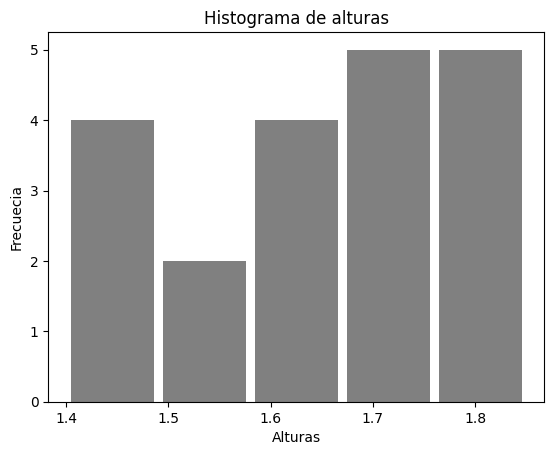

In [89]:
plt.hist(lista, bins=5, color='gray', rwidth=0.9)
plt.title("Histograma de alturas")
plt.xlabel("Alturas")
plt.ylabel("Frecuecia")
plt.show()

3. Utilizando pandas describa el dataframe.

In [90]:
df=pd.DataFrame(lista)
df.describe()
#por lo visto el std del describe se refiere a n-1

,0
count,20.000000
mean,1.641500
std,0.136277
min,1.400000
25%,1.562500
50%,1.660000
75%,1.752500
max,1.850000


In [91]:
df.value_counts()

1.80    3
1.40    1
1.42    1
1.76    1
1.75    1
1.73    1
1.70    1
1.69    1
1.67    1
1.65    1
1.60    1
1.59    1
1.58    1
1.57    1
1.54    1
1.48    1
1.45    1
1.85    1
Name: count, dtype: int64

In [92]:
print(np.count_nonzero(muestra))
print(np.mean(muestra))
print(np.std(muestra))
print(np.median(muestra))
print(np.var(muestra))

20
1.6415
0.13282601401833907
1.66
0.017642750000000006


4. Con los siguientes datos construye un df y un array que permitan describir adecuadamente la muestra.<br>
'Ingreso en miles' : 10.5	6.8	20.7	18.2	8.6	25.8	22.2	5.9	7.6	11.8 <br>
'Años de estudio': 17	18	21	16	16	21	16	14	18	18 

In [93]:
lista_ingreso=[10.5,6.8,20.7,18.2,8.6,25.8,22.2,5.9,7.6,11.8]
lista_anos=[17,18,21,16,16,21,16,14,18,18]

dicc={'Ingreso en miles' : lista_ingreso, 'Años de estudio': lista_anos}
df=pd.DataFrame(dicc)
df

,Ingreso en miles,Años de estudio
0,10.5,17
1,6.8,18
2,20.7,21
3,18.2,16
4,8.6,16
5,25.8,21
6,22.2,16
7,5.9,14
8,7.6,18
9,11.8,18


In [94]:
df.describe()

,Ingreso en miles,Años de estudio
count,10.000000,10.000000
mean,13.810000,17.500000
std,7.251889,2.223611
min,5.900000,14.000000
25%,7.850000,16.000000
50%,11.150000,17.500000
75%,20.075000,18.000000
max,25.800000,21.000000


In [95]:
arreglo=np.array((lista_ingreso,lista_anos))
arreglo
for fila in arreglo:
    print("con size", fila.size)
    print("count: ",np.count_nonzero(fila))
    print("con shape", np.shape(fila)[0])
    print("con len:" , len(fila))
    print("mean: ",np.mean(fila))
    print("desvio std: ",np.std(fila))
    print("mediana: ",np.median(fila))
    print("varianza :" ,np.var(fila),"\n")

con size 10
count:  10
con shape 10
con len: 10
mean:  13.809999999999999
desvio std:  6.87974563483273
mediana:  11.15
varianza : 47.3309 

con size 10
count:  10
con shape 10
con len: 10
mean:  17.5
desvio std:  2.1095023109728985
mediana:  17.5
varianza : 4.45 



5. Realice un histograma para de 6 secciones para 'Ingreso en miles' y 'Años de estudio'.

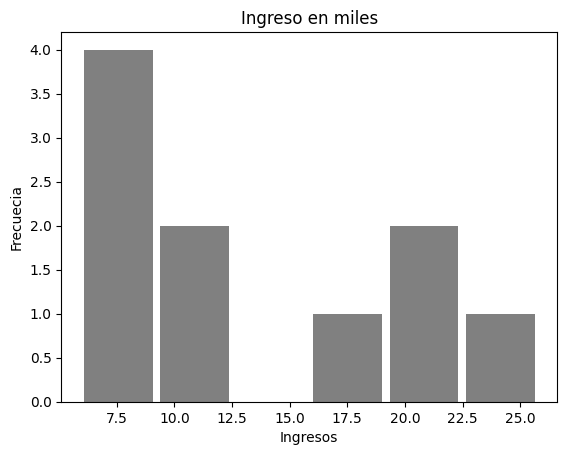

In [96]:
plt.hist(lista_ingreso, bins=6, color='gray', rwidth=0.9)
plt.title('Ingreso en miles')
plt.xlabel("Ingresos")
plt.ylabel("Frecuecia")
plt.show()

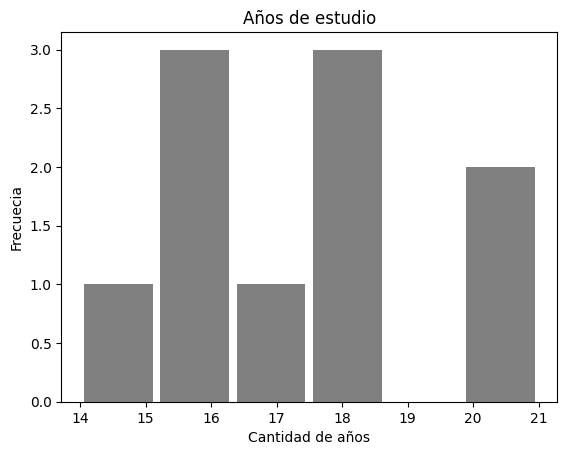

In [97]:
plt.hist(lista_anos, bins=6, color='gray', rwidth=0.9)
plt.title('Años de estudio')
plt.xlabel("Cantidad de años")
plt.ylabel("Frecuecia")
plt.show()

6. Cálcula la media de 'Ingreso en miles' (df) utilizando pandas.

In [98]:
df['Ingreso en miles'].mean()

13.809999999999999

7. Cálcula la media de 'Ingreso en miles' (array) utilizando numpy.

In [99]:
arreglo[0].mean()

13.809999999999999

In [100]:
df['Ingreso en miles'].value_counts()

Ingreso en miles
10.5    1
6.8     1
20.7    1
18.2    1
8.6     1
25.8    1
22.2    1
5.9     1
7.6     1
11.8    1
Name: count, dtype: int64

In [101]:
df['Ingreso en miles'].std(ddof=0)

6.87974563483273

In [102]:
df['Ingreso en miles'].std(ddof=1)

7.2518886428908225

In [103]:
df['Ingreso en miles'].std()

7.2518886428908225

8. Agregue los siguientes valores extremos al df [ 50, 35 ], [ 120, 30 ]. ¿En cuanto vario la media?, ¿Qué conclusiones obtiene de este resultado sobre la media?.

In [104]:
new = {'Ingreso en miles': [50,120],'Años de estudio': [35,30]}
dfnew=pd.DataFrame(new)
dfnew

,Ingreso en miles,Años de estudio
0,50,35
1,120,30


In [105]:
dffinal = pd.concat([df, dfnew], ignore_index=True)
dffinal

,Ingreso en miles,Años de estudio
0,10.5,17
1,6.8,18
2,20.7,21
3,18.2,16
4,8.6,16
5,25.8,21
6,22.2,16
7,5.9,14
8,7.6,18
9,11.8,18


In [106]:
dffinal.describe()

,Ingreso en miles,Años de estudio
count,12.000000,12.000000
mean,25.675000,20.000000
std,32.150219,6.266796
min,5.900000,14.000000
25%,8.350000,16.000000
50%,15.000000,18.000000
75%,23.100000,21.000000
max,120.000000,35.000000


In [107]:
df.describe()

,Ingreso en miles,Años de estudio
count,10.000000,10.000000
mean,13.810000,17.500000
std,7.251889,2.223611
min,5.900000,14.000000
25%,7.850000,16.000000
50%,11.150000,17.500000
75%,20.075000,18.000000
max,25.800000,21.000000


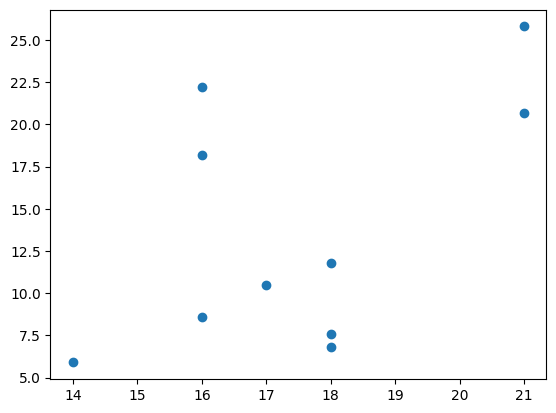

In [108]:
plt.scatter(df['Años de estudio'], df['Ingreso en miles'])